In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/Users/kanso/OneDrive/Desktop/Kanso/University/Year 3/Principles of Data Science/Tutorial 5/train.csv')

df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [2]:
df.fillna(0)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

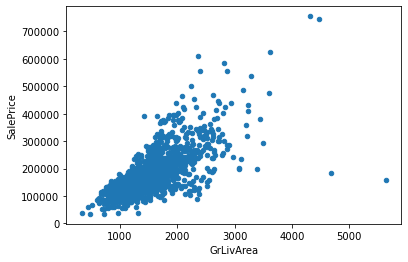

In [3]:
#Plot a Scatter Graph
df.plot.scatter(x = 'GrLivArea', y = 'SalePrice')

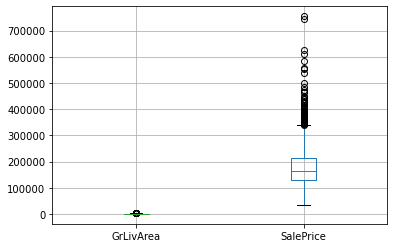

In [4]:
boxplot = df.boxplot(column=['GrLivArea', 'SalePrice'])  

C:\Users\kanso\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

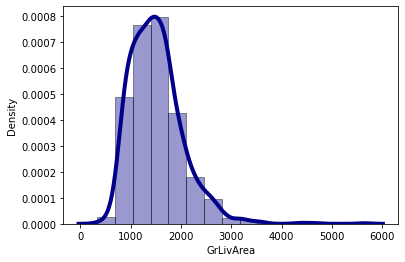

In [5]:
sns.distplot(df['GrLivArea'], hist=True, kde=True, 
             bins=int(15), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\kanso\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

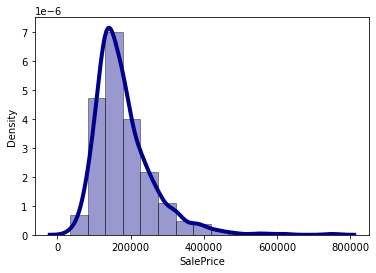

In [6]:
sns.distplot(df['SalePrice'], hist=True, kde=True, 
             bins=int(15), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [7]:
#Split dataset to X and Y variables
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
Y = df.SalePrice
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [8]:
X = df[['GrLivArea']]
X

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198
...,...
1455,1647
1456,2073
1457,2340
1458,1078


In [15]:
#Data split
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
X_train.shape, Y_train.shape

((1168, 1), (1168,))

In [18]:
X_test.shape, Y_test.shape

((292, 1), (292,))

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [106.27853664]
Intercept: 19820.586551727145
Mean squared error (MSE): 3089743035.67
Coefficient of determination (R^2): 0.49


In [20]:
r2_score(Y_test, Y_pred)

0.49341030319014434

In [21]:
r2_score(Y_test, Y_pred).dtype

dtype('float64')

In [22]:
'%f' % 0.523810833536016

'0.523811'

In [23]:
'%.3f' % 0.523810833536016

'0.524'

In [24]:

'%.2f' % 0.523810833536016

'0.52'

In [25]:

import seaborn as sns

Y_test

616     183200
1302    290000
724     320000
984     126000
627     153000
         ...  
305     305900
1455    175000
112     383970
245     241500
1204    153500
Name: SalePrice, Length: 292, dtype: int64

In [26]:
import numpy as np
np.array(Y_test)

array([183200, 290000, 320000, 126000, 153000, 200000, 139000,  95000,
       135000, 128500, 127500, 110000, 285000, 232600, 110000, 125000,
       204000, 105000, 110000, 185000, 248900, 237000, 149500, 120500,
       335000, 395192, 143250, 257000, 132000, 248000, 127500, 152000,
       178000, 168000, 179400, 149350, 140000, 109008,  55000, 119000,
       188500, 239000, 140000, 200624, 128000, 227000, 133000, 129900,
        68500, 125000, 140000, 113000, 122500, 137450, 148000, 380000,
       187750, 252000, 148000, 124500, 201000, 130000, 187000, 137000,
       137500, 160000, 337500, 152000, 235000, 264561, 372500, 375000,
       214900, 139500, 149000, 270000, 129500, 128000, 108480, 194700,
       233170, 197900, 219500, 127000, 185000, 160000, 140000, 215000,
       127000, 115000, 145000, 123000, 193879,  87000, 190000, 135000,
       180000, 174000, 192000, 220000, 260000, 119000, 175900, 112000,
       225000, 340000, 359100, 378500, 107000, 209500, 374000, 157900,
      

In [27]:
Y_pred

array([180194.89833858, 288280.17009951, 200281.54176318, 204107.56908215,
       181363.9622416 , 241942.72812531, 193267.15834507, 200387.82029982,
       176050.0354097 , 124823.78075015, 111645.24220702, 147673.66612733,
       197093.18566404, 178069.32760582, 101973.89537296, 143528.80319845,
       206445.69688819, 112814.30611004, 114833.59830617, 202407.11249594,
       194755.057858  , 235672.29446366, 179769.78419203, 102505.28805615,
       287536.22034304, 226000.94762959, 124079.83099368, 215798.20811234,
       172011.45101745, 262667.04276973, 165103.34613598, 191566.70175886,
       186784.16761014, 172542.84370064, 179344.67004548, 150330.62954328,
       185402.54663385, 116215.21928246, 135876.74856051, 203469.89786232,
       172011.45101745, 207614.76079121, 189334.85248946, 287111.10619649,
       121635.424651  , 196774.35005412, 154581.77100881, 208358.71054767,
        75085.42560353, 176262.59248298, 133751.17782774, 131200.49294843,
       263198.43545292, 1

C:\Users\kanso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

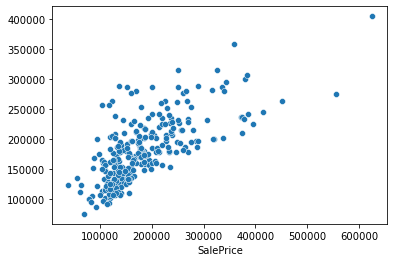

In [28]:

sns.scatterplot(Y_test, Y_pred)

C:\Users\kanso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

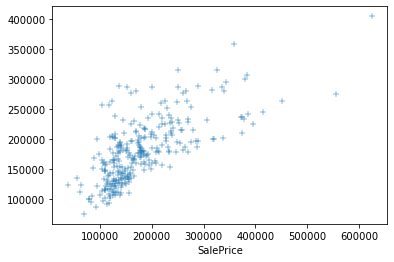

In [29]:
sns.scatterplot(Y_test, Y_pred, marker="+")

C:\Users\kanso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

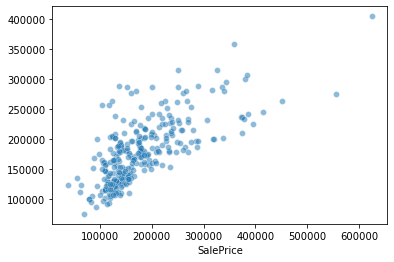

In [30]:
sns.scatterplot(Y_test, Y_pred, alpha=0.5)

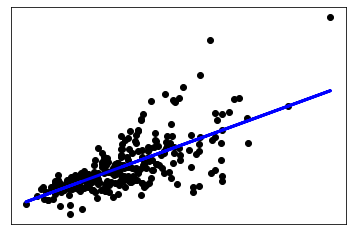

In [33]:
# Plot outputs
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, Y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [34]:

df2 = pd.read_csv('/Users/kanso/OneDrive/Desktop/Kanso/University/Year 3/Principles of Data Science/Tutorial 5/censusCrimeClean.csv')

df2

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [36]:
med_Income = df2["medIncome"] 
violent_Crimes = df2["ViolentCrimesPerPop"]

In [40]:
modelledDependent = np.polyval(['medIncome', intercept], 'ViolentCrimesPerPo'p)

NameError: name 'intercept' is not defined